In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cardio = pd.read_csv("../../results/vary-dim/cardio.csv")
musk = pd.read_csv("../../results/vary-dim/musk.csv")
thyroid = pd.read_csv("../../results/vary-dim/thyroid.csv")
wbc = pd.read_csv("../../results/vary-dim/wbc.csv")

In [4]:
cardio.head()

,Unnamed: 0,n_features,accuracy,precision,recall,f1,coverage_ratio,mean_distance
0,0,2.0,0.915531,0.915531,1.000000,0.955903,0.0,NaN
1,1,3.0,0.915531,0.929577,0.982143,0.955137,1.0,0.101699
2,2,4.0,0.959128,0.970674,0.985119,0.977843,1.0,0.135127
3,3,5.0,0.967302,0.970930,0.994048,0.982353,1.0,0.199477
4,4,6.0,0.975477,0.982301,0.991071,0.986667,1.0,0.207561


In [5]:
cmap = plt.get_cmap("Set1")
colors = cmap.colors

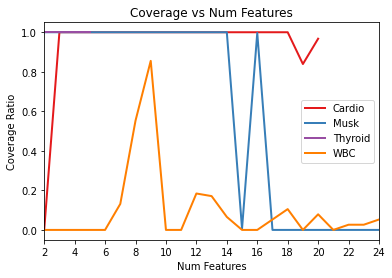

In [6]:
# coverage
plt.figure()
plt.plot(cardio.n_features, cardio.coverage_ratio, label="Cardio", color=colors[0], lw=2.0)
plt.plot(musk.n_features, musk.coverage_ratio, label="Musk", color=colors[1], lw=2.0)
plt.plot(thyroid.n_features, thyroid.coverage_ratio, label="Thyroid", color=colors[3], lw=2.0)
plt.plot(wbc.n_features, wbc.coverage_ratio, label="WBC", color=colors[4], lw=2.0)
plt.xlabel("Num Features")
plt.ylabel("Coverage Ratio")
plt.title("Coverage vs Num Features")
plt.legend(loc="best")
plt.xlim([2, 21])
plt.xticks(range(2, 25, 2))
plt.savefig("coverage_nfeatures.png")

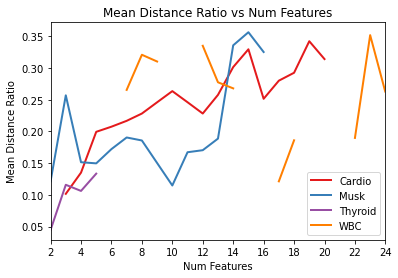

In [13]:
# distance
plt.figure()
plt.plot(cardio.n_features, cardio.mean_distance, label="Cardio", color=colors[0], lw=2.0)
plt.plot(musk.n_features, musk.mean_distance, label="Musk", color=colors[1], lw=2.0)
plt.plot(thyroid.n_features, thyroid.mean_distance, label="Thyroid", color=colors[3], lw=2.0)
plt.plot(wbc.n_features, wbc.mean_distance , label="WBC", color=colors[4], lw=2.0)
plt.xlabel("Num Features")
plt.ylabel("Mean Distance Ratio")
plt.title("Mean Distance Ratio vs Num Features")
plt.legend(loc="best")
plt.xlim([2, 21])
plt.xticks(range(2, 25, 2))
plt.savefig("distance_nfeatures.png")

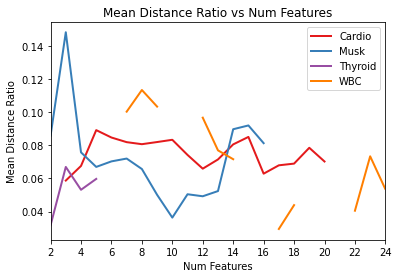

In [10]:
# distance
plt.figure()
plt.plot(cardio.n_features, cardio.mean_distance / np.sqrt(cardio.n_features), label="Cardio", color=colors[0], lw=2.0)
plt.plot(musk.n_features, musk.mean_distance / np.sqrt(musk.n_features), label="Musk", color=colors[1], lw=2.0)
plt.plot(thyroid.n_features, thyroid.mean_distance / np.sqrt(thyroid.n_features), label="Thyroid", color=colors[3], lw=2.0)
plt.plot(wbc.n_features, wbc.mean_distance / np.sqrt(wbc.n_features), label="WBC", color=colors[4], lw=2.0)
plt.xlabel("Num Features")
plt.ylabel("Mean Distance Ratio")
plt.title("Mean Distance Ratio vs Num Features")
plt.legend(loc="best")
plt.xlim([2, 21])
plt.xticks(range(2, 25, 2))
plt.savefig("distance_ratio_nfeatures.png")

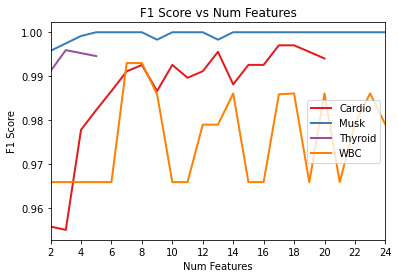

In [17]:
# f1 score
plt.figure()
plt.plot(cardio.n_features, cardio.f1, label="Cardio", color=colors[0], lw=2.0)
plt.plot(musk.n_features, musk.f1, label="Musk", color=colors[1], lw=2.0)
plt.plot(thyroid.n_features, thyroid.f1, label="Thyroid", color=colors[3], lw=2.0)
plt.plot(wbc.n_features, wbc.f1, label="WBC", color=colors[4], lw=2.0)
plt.xlabel("Num Features")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Num Features")
plt.legend(loc="best")
plt.xlim([2, 21])
plt.xticks(range(2, 25, 2))
plt.savefig("f1_nfeatures.png")